In [28]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

options = Options()
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
options.add_argument(f"user-agent={user_agent}")
options.add_argument("--headless")  # بدون باز شدن پنجره مرورگر

driver = webdriver.Chrome(options=options)

base_url = "https://divar.ir/s/tehran/rent-villa"
all_listings = []

for page in range(1, 10):  # گرفتن ۹ صفحه
    print(f"Fetching page {page}...")
    url = f"{base_url}?page={page}"
    driver.get(url)
    time.sleep(5)  # صبر برای لود کامل صفحه

    ads = driver.find_elements(By.CSS_SELECTOR, "article.unsafe-kt-post-card")
    if not ads:
        print("دیگه آگهی بیشتری وجود نداره")
        break

    for ad in ads:
        try:
            title = ad.find_element(By.CSS_SELECTOR, "h2.unsafe-kt-post-card__title").text
            price_elems = ad.find_elements(By.CSS_SELECTOR, "div.unsafe-kt-post-card__description")
            deposit = price_elems[0].text if len(price_elems) > 0 else ""
            rent = price_elems[1].text if len(price_elems) > 1 else ""
            location = ad.find_element(By.CSS_SELECTOR, "span.unsafe-kt-post-card__bottom-description").get_attribute("title")
            link = ad.find_element(By.CSS_SELECTOR, "a.unsafe-kt-post-card__action").get_attribute("href")
            if not link.startswith("http"):
                link = "https://divar.ir" + link

            listing = {
                "title": title,
                "location": location,
                "deposit": deposit,
                "rent": rent,
                "link": link
            }
            all_listings.append(listing)
        except Exception as e:
            print("خطا در خواندن یک آگهی:", e)

driver.quit()

# ذخیره در CSV
df = pd.DataFrame(all_listings)
df.to_csv("divar_listings.csv", index=False)
print(f"\nتعداد کل آگهی‌ها جمع‌آوری شده: {len(df)}")


Fetching page 1...
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...
Fetching page 6...
Fetching page 7...
Fetching page 8...
Fetching page 9...

تعداد کل آگهی‌ها جمع‌آوری شده: 126


<div style = "direction : rtl ;">




✅ مراحل اصلی پروژه:


- Data Collection (جمع‌آوری داده): ✔️ تمام شد
- Data Cleaning & Preprocessing (پاکسازی و پیش‌پردازش داده)
- Exploratory Data Analysis (EDA) (تحلیل اولیه داده)
- Feature Engineering (مهندسی ویژگی)
- Modeling : استفاده از الگوریتم‌های ML برای پیش‌بینی قیمت یا طبقه‌بندی نوع خانه
- Deployment / Visualization : نمایش نتایج به صورت تعاملی یا تهیه گزارش
- Export Final Report : گزارش نهایی به صورت Markdown + HTML

</div>

In [29]:
df = pd.read_csv("divar_listings.csv")
df.head()

,title,location,deposit,rent,link
0,رهن خانه ویلایی,در امین حضور,"ودیعه: ۱۰۰,۰۰۰,۰۰۰ تومان","اجاره: ۱۵,۰۰۰,۰۰۰ تومان",https://divar.ir/v/%D8%B1%D9%87%D9%86-%D8%AE%D...
1,۶۰متر دربستی بدون مالک,آژانس املاک عمارت در جوادیه تهرانپارس,"ودیعه: ۵۸۰,۰۰۰,۰۰۰ تومان",رهن کامل,https://divar.ir/v/%DB%B6%DB%B0%D9%85%D8%AA%D8...
2,رهن خانه ویلایی ۱۲۰ متری بازسازی شده,۱ ساعت پیش در سلیمانی,"ودیعه: ۹۰۰,۰۰۰,۰۰۰ تومان",رهن کامل,https://divar.ir/v/%D8%B1%D9%87%D9%86-%D8%AE%D...
3,ویلایی شهید محلاتی,۱ ساعت پیش در شهرک محلاتی,"ودیعه: ۲,۰۰۰,۰۰۰,۰۰۰ تومان","اجاره: ۶۰,۰۰۰,۰۰۰ تومان",https://divar.ir/v/%D9%88%DB%8C%D9%84%D8%A7%DB...
4,خ دولت ۳۰۰ متر دوبلکس ۴ پارکینگ,آژانس توسعه کار آفرین در درب دوم,"ودیعه: ۲,۰۰۰,۰۰۰,۰۰۰ تومان","اجاره: ۲۵۰,۰۰۰,۰۰۰ تومان",https://divar.ir/v/%D8%AE-%D8%AF%D9%88%D9%84%D...


In [30]:
df = pd.read_csv("divar_listings.csv")

# تابع استخراج عدد
def extract_number(text):
    # جایگزینی اعداد فارسی با انگلیسی
    text = text.translate(str.maketrans("۰۱۲۳۴۵۶۷۸۹", "0123456789"))
    
    # حذف کاراکترهای غیرعددی به جز ارقام و اعشار
    cleaned_text = re.sub(r"[^0-9]", "", text)
    
    if cleaned_text:
        return int(cleaned_text)
    return 0  # اگر عددی پیدا نشد


# اضافه کردن ستون‌های عددی
df['deposit_num'] = df['deposit'].apply(extract_number)
df['rent_num'] = df['rent'].apply(extract_number)

# تبدیل به میلیون تومان (اختیاری)
df['deposit_million'] = df['deposit_num'] / 1e6
df['rent_million'] = df['rent_num'] / 1e6


# ✅ حالا فیلتر را اعمال کن
filtered_df = df[(df['deposit_num'] < 1_000_000_000) & (df['rent_num'] < 30_000_000)]

# نمایش نتایج
print(f"تعداد آگهی‌های باقی‌مانده: {len(filtered_df)}")
filtered_df[['title', 'location', 'deposit', 'rent', 'deposit_num', 'rent_num']].head()

تعداد آگهی‌های باقی‌مانده: 52


,title,location,deposit,rent,deposit_num,rent_num
0,رهن خانه ویلایی,در امین حضور,"ودیعه: ۱۰۰,۰۰۰,۰۰۰ تومان","اجاره: ۱۵,۰۰۰,۰۰۰ تومان",100000000,15000000
1,۶۰متر دربستی بدون مالک,آژانس املاک عمارت در جوادیه تهرانپارس,"ودیعه: ۵۸۰,۰۰۰,۰۰۰ تومان",رهن کامل,580000000,0
2,رهن خانه ویلایی ۱۲۰ متری بازسازی شده,۱ ساعت پیش در سلیمانی,"ودیعه: ۹۰۰,۰۰۰,۰۰۰ تومان",رهن کامل,900000000,0
5,اجاره خانه نعمت اباد,۱ ساعت پیش در نعمت‌آباد,"ودیعه: ۱۰۰,۰۰۰,۰۰۰ تومان","اجاره: ۵,۰۰۰,۰۰۰ تومان",100000000,5000000
7,رهن خانه ویلایی ۷۰ متری ۱ خوابه در اتابک,۱ ساعت پیش در اتابک,"ودیعه: ۴۵۰,۰۰۰,۰۰۰ تومان",رهن کامل,450000000,0


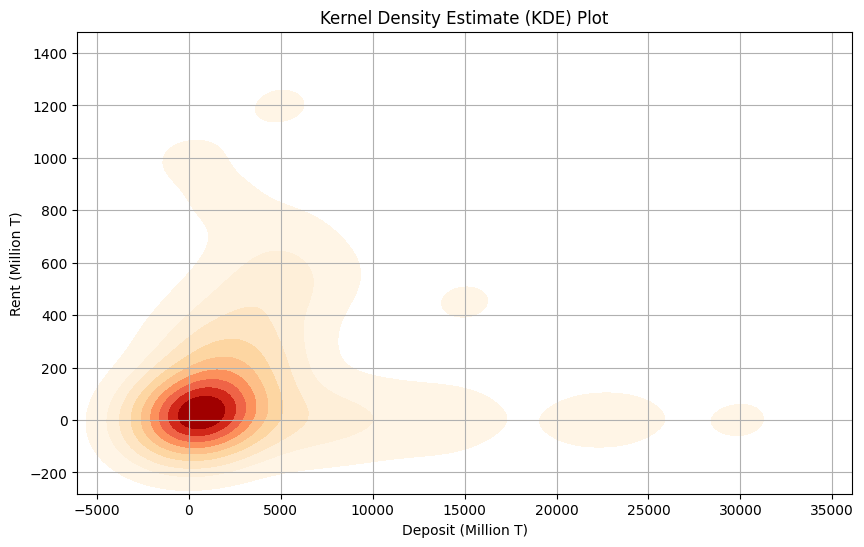

In [31]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='deposit_million', y='rent_million', fill=True, cmap='OrRd')
plt.title("Kernel Density Estimate (KDE) Plot")
plt.xlabel("Deposit (Million T)")
plt.ylabel("Rent (Million T)")
plt.grid(True)
plt.show()

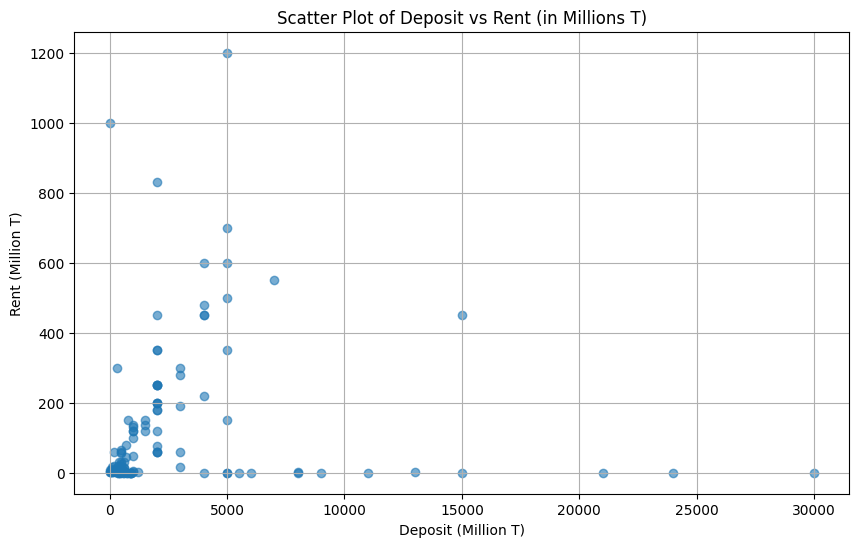

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df['deposit_million'], df['rent_million'], alpha=0.6)
plt.title("Scatter Plot of Deposit vs Rent (in Millions T)")
plt.xlabel("Deposit (Million T)")
plt.ylabel("Rent (Million T)")
plt.grid(True)
plt.show()

حالا میخوام تمرکز رو ببرم روی دیتاهای اصلی وو دیتاهای پرت فیلتر بشن

In [33]:
# فیلتر کردن: ودیعه کمتر از یک میلیارد و اجاره کمتر از ۳۰ میلیون
filtered_df = df[(df['deposit_num'] < 1_000_000_000) & (df['rent_num'] < 30_000_000)]

# نمایش تعداد و چند نمونه
print(f"تعداد آگهی‌های باقی‌مانده: {len(filtered_df)}")
filtered_df[['title', 'location', 'deposit_million', 'rent_million']]

تعداد آگهی‌های باقی‌مانده: 52


,title,location,deposit_million,rent_million
0,رهن خانه ویلایی,در امین حضور,100.0,15.0
1,۶۰متر دربستی بدون مالک,آژانس املاک عمارت در جوادیه تهرانپارس,580.0,0.0
2,رهن خانه ویلایی ۱۲۰ متری بازسازی شده,۱ ساعت پیش در سلیمانی,900.0,0.0
5,اجاره خانه نعمت اباد,۱ ساعت پیش در نعمت‌آباد,100.0,5.0
7,رهن خانه ویلایی ۷۰ متری ۱ خوابه در اتابک,۱ ساعت پیش در اتابک,450.0,0.0
8,۵۰ متر ۲ طبقه / دربستی / بازسازی شده,املاک آینده در بریانک,350.0,7.0
9,خانه دربستی اجاره ای,۱ ساعت پیش در گلچین,400.0,6.0
11,دربستی ۲ طبقه ( تخلیه ),مشاور محمد نظری در زهتابی,600.0,1.5
12,اجاره خانه ویلایی ۶۵ متری ۲ خوابه در خلیج فارس,۱ ساعت پیش در خلیج فارس,600.0,5.0
13,خانه ویلای 2 طبقه60متری/حسن زندیه/مناسب 2 خانواده,آژانس املاک الماس در ابراهیم‌آباد,750.0,0.0


In [34]:
filtered_df.to_csv("divar_filtered_by_deposit_rent.csv", index=False)
print("لیست فیلتر شده ذخیره شد!")

لیست فیلتر شده ذخیره شد!


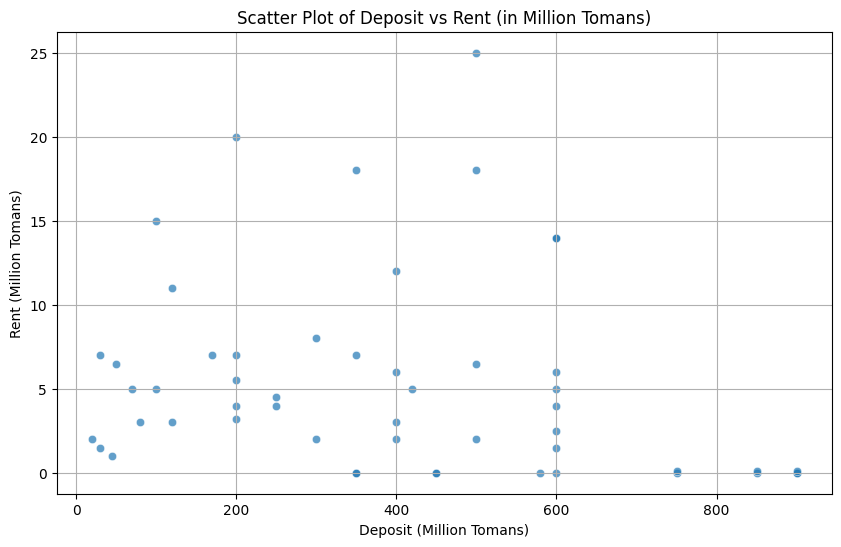

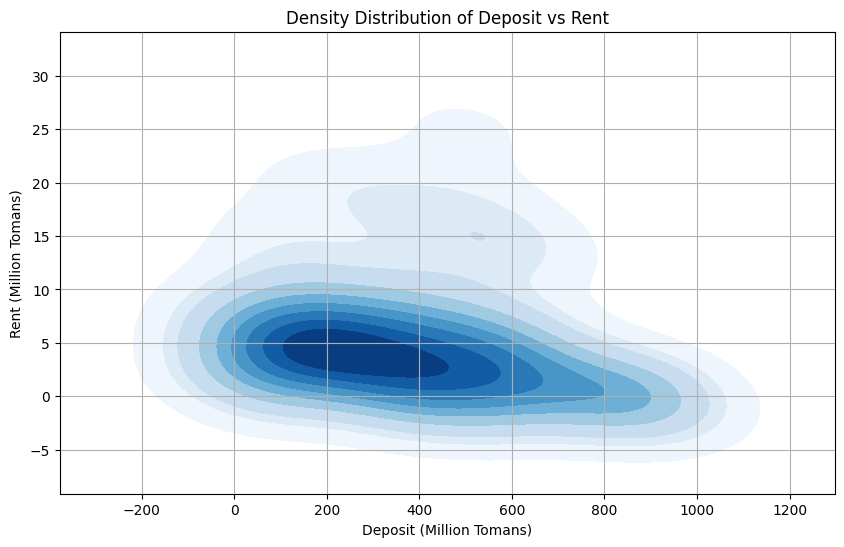

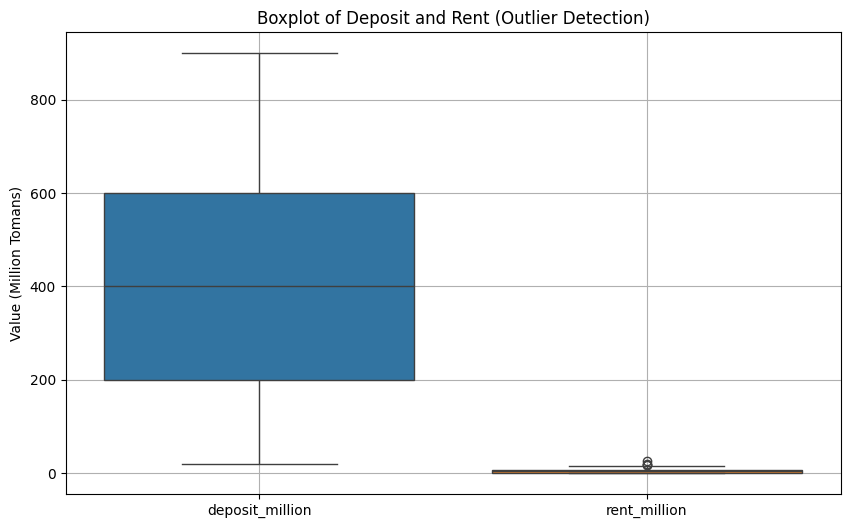

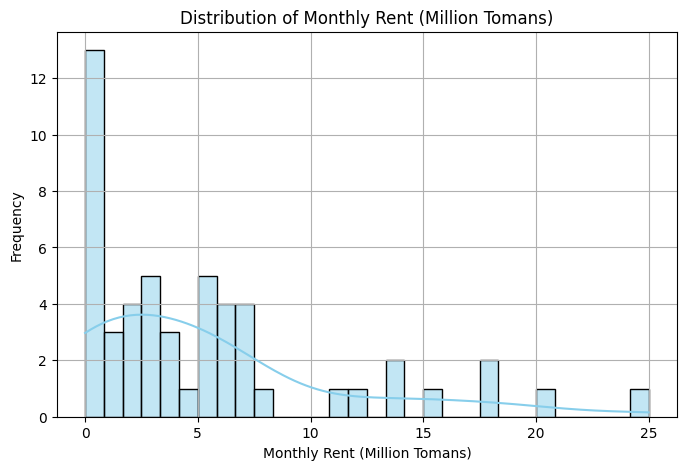

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Scatter Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='deposit_million', y='rent_million', alpha=0.7)
plt.title("Scatter Plot of Deposit vs Rent (in Million Tomans)")
plt.xlabel("Deposit (Million Tomans)")
plt.ylabel("Rent (Million Tomans)")
plt.grid(True)
plt.show()

# --- 2. KDE Plot ---
plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_df, x='deposit_million', y='rent_million', fill=True, cmap="Blues")
plt.title("Density Distribution of Deposit vs Rent")
plt.xlabel("Deposit (Million Tomans)")
plt.ylabel("Rent (Million Tomans)")
plt.grid(True)
plt.show()

# --- 3. Boxplot for Outlier Detection ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df[['deposit_million', 'rent_million']])
plt.title("Boxplot of Deposit and Rent (Outlier Detection)")
plt.ylabel("Value (Million Tomans)")
plt.grid(True)
plt.show()

# --- 4. Histogram of Rent Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(filtered_df['rent_million'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Monthly Rent (Million Tomans)")
plt.xlabel("Monthly Rent (Million Tomans)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [36]:
# ضریب همبستگی بین ودیعه و اجاره
correlation = filtered_df['deposit_num'].corr(filtered_df['rent_num'])
print(f"ضریب همبستگی بین ودیعه و اجاره: {correlation:.2f}")

# آمار توصیفی
print("\nآمار توصیفی:")
print(filtered_df[['deposit_million', 'rent_million']].describe())

ضریب همبستگی بین ودیعه و اجاره: -0.21

آمار توصیفی:
       deposit_million  rent_million
count        52.000000     52.000000
mean        396.826923      5.326923
std         255.910579      5.873607
min          20.000000      0.000000
25%         200.000000      0.775000
50%         400.000000      4.000000
75%         600.000000      7.000000
max         900.000000     25.000000


In [37]:
# Feature Engineering - نسبت اجاره به ودیعه
filtered_df['rent_to_deposit_ratio'] = filtered_df['rent_num'] / filtered_df['deposit_num']

# نمایش چند ردیف
filtered_df[['title', 'location', 'deposit_million', 'rent_million', 'rent_to_deposit_ratio']].head()

/var/folders/c6/kh1v5smn18l3tbcsjpvvqv1h0000gn/T/ipykernel_40057/2833101977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rent_to_deposit_ratio'] = filtered_df['rent_num'] / filtered_df['deposit_num']


,title,location,deposit_million,rent_million,rent_to_deposit_ratio
0,رهن خانه ویلایی,در امین حضور,100.0,15.0,0.15
1,۶۰متر دربستی بدون مالک,آژانس املاک عمارت در جوادیه تهرانپارس,580.0,0.0,0.00
2,رهن خانه ویلایی ۱۲۰ متری بازسازی شده,۱ ساعت پیش در سلیمانی,900.0,0.0,0.00
5,اجاره خانه نعمت اباد,۱ ساعت پیش در نعمت‌آباد,100.0,5.0,0.05
7,رهن خانه ویلایی ۷۰ متری ۱ خوابه در اتابک,۱ ساعت پیش در اتابک,450.0,0.0,0.00


In [38]:
# ۱. فیلتر کن
filtered_df = df[(df['deposit_num'] < 1_000_000_000) & (df['rent_num'] < 30_000_000)]

# ۲. اطمینان از اینکه دیتا مستقل است
filtered_df = filtered_df.copy()

# ۳. اضافه کردن ویژگی جدید با مدیریت تقسیم بر صفر
filtered_df.loc[:, 'rent_to_deposit_ratio'] = np.where(
    filtered_df['deposit_num'] == 0,  # اگر deposit_num صفر بود...
    0,  # مقدار 0 قرار بده
    filtered_df['rent_num'] / filtered_df['deposit_num']  # در غیر اینصورت نسبت رو حساب کن
)

In [39]:
print(filtered_df['rent_to_deposit_ratio'].describe())

count    52.000000
mean      0.030590
std       0.044630
min       0.000000
25%       0.001908
50%       0.016000
75%       0.036375
max       0.233333
Name: rent_to_deposit_ratio, dtype: float64


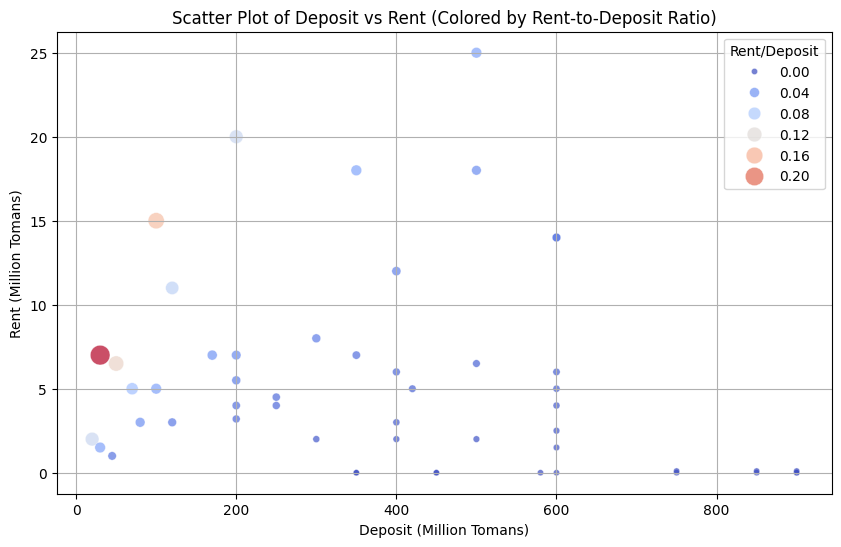

In [40]:
# --- چک کنیم rent_to_deposit_ratio وجود داره؟ ---
if 'rent_to_deposit_ratio' not in filtered_df.columns:
    print("ستون rent_to_deposit_ratio وجود نداره، در حال ساخت...")
    filtered_df['rent_to_deposit_ratio'] = np.where(
        filtered_df['deposit_num'] == 0,
        0,
        filtered_df['rent_num'] / filtered_df['deposit_num']
    )

# --- حالا نمودار رو بکش ---
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=filtered_df,
    x='deposit_million',
    y='rent_million',
    hue='rent_to_deposit_ratio',
    palette='coolwarm',
    alpha=0.7,
    size='rent_to_deposit_ratio',
    sizes=(20, 200)
)
plt.title("Scatter Plot of Deposit vs Rent (Colored by Rent-to-Deposit Ratio)")
plt.xlabel("Deposit (Million Tomans)")
plt.ylabel("Rent (Million Tomans)")
plt.grid(True)
plt.legend(title="Rent/Deposit")
plt.show()

### Modeling

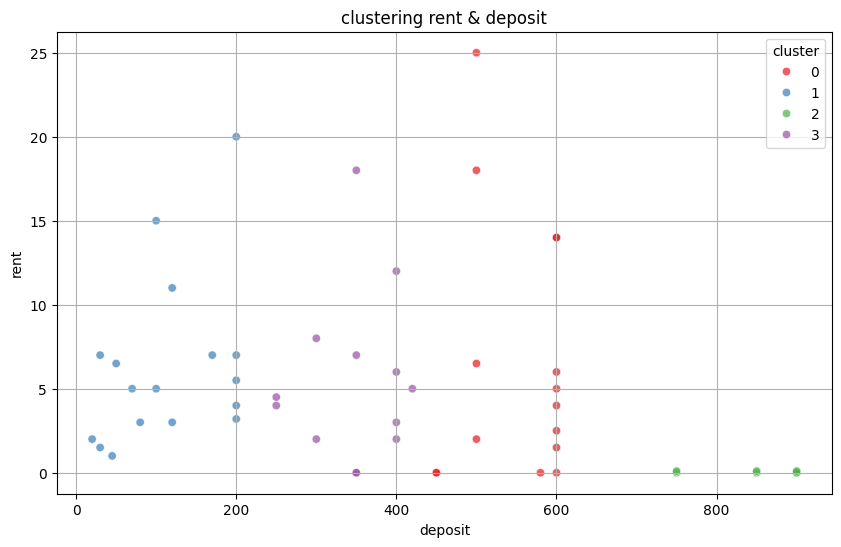

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# انتخاب ویژگی‌ها
X = filtered_df[['deposit_num', 'rent_num']]

# خوشه‌بندی با KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
filtered_df['cluster'] = kmeans.fit_predict(X)

# نمایش نتایج
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='deposit_million', y='rent_million', hue='cluster', palette='Set1', alpha=0.7)
plt.title("clustering rent & deposit")
plt.xlabel( "deposit")
plt.ylabel("rent")
plt.grid(True)
plt.show()

In [42]:
# --- سلول ۱: خواندن، تمیز کردن و فیلتر ---
import pandas as pd
import numpy as np
import re

# --- ۱. خواندن داده ---
df = pd.read_csv("divar_listings.csv")


# --- ۲. تابع تمیز کردن و استخراج عدد ---
def extract_number(text):
    text = text.translate(str.maketrans("۰۱۲۳۴۵۶۷۸۹", "0123456789"))
    cleaned_text = re.sub(r"[^0-9]", "", text)
    return int(cleaned_text) if cleaned_text else 0


# --- ۳. ساخت ستون‌های عددی ---
df['deposit_num'] = df['deposit'].apply(extract_number)
df['rent_num'] = df['rent'].apply(extract_number)

df['deposit_million'] = df['deposit_num'] / 1e6
df['rent_million'] = df['rent_num'] / 1e6


# --- ۴. فیلتر کردن داده ---
filtered_df = df[(df['deposit_num'] < 1_000_000_000) & (df['rent_num'] < 30_000_000)].copy()


# --- ۵. ساخت ویژگی rent_to_deposit_ratio ---
filtered_df['rent_to_deposit_ratio'] = np.where(
    filtered_df['deposit_num'] == 0,
    0,
    filtered_df['rent_num'] / filtered_df['deposit_num']
)


# --- چک کردن inf و NaN در X ---
X = filtered_df[['deposit_num', 'rent_to_deposit_ratio']]
y = filtered_df['rent_num']

X = X.replace([np.inf, -np.inf], np.nan).fillna(0).astype(np.float64)
y = y[X.index]

print("تعداد ردیف در X:", len(X))
print("تعداد ردیف در y:", len(y))

# --- ذخیره X و y برای استفاده در سلول‌های بعدی ---
import pickle
pickle.dump((X, y), open("X_y_data.pkl", "wb"))

print("داده آماده شد و ذخیره شد!")

تعداد ردیف در X: 52
تعداد ردیف در y: 52
داده آماده شد و ذخیره شد!


Linear Regression

RMSE (Linear Regression): 3.95 Million Tomans


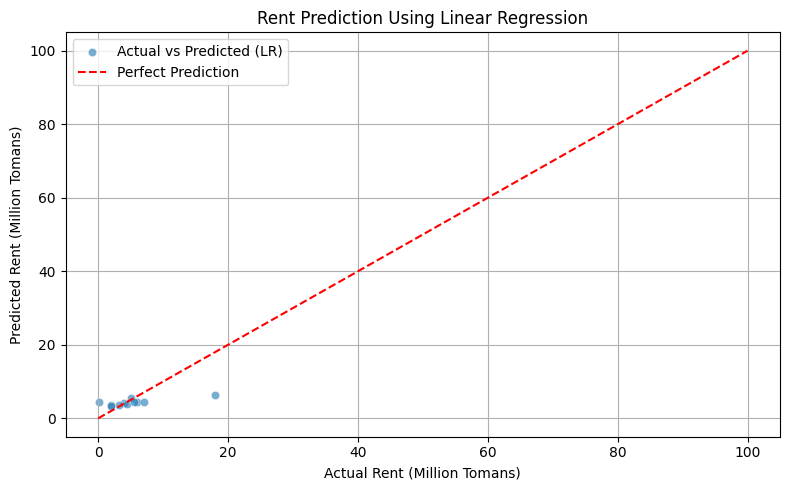

In [43]:
# --- سلول ۲: مدل Linear Regression ---


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# --- بارگذاری X و y ---
X, y = pickle.load(open("X_y_data.pkl", "rb"))


# --- تقسیم داده ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- مدل Linear Regression ---
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# --- محاسبه RMSE ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE (Linear Regression): {rmse / 1e6:.2f} Million Tomans")


# --- نمودار Actual vs Predicted ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test / 1e6, y=y_pred / 1e6, alpha=0.6, label="Actual vs Predicted (LR)")
plt.plot([0, 100], [0, 100], color='red', linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Rent (Million Tomans)")
plt.ylabel("Predicted Rent (Million Tomans)")
plt.title("Rent Prediction Using Linear Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Random forest

RMSE (Random Forest): 1.76 Million Tomans


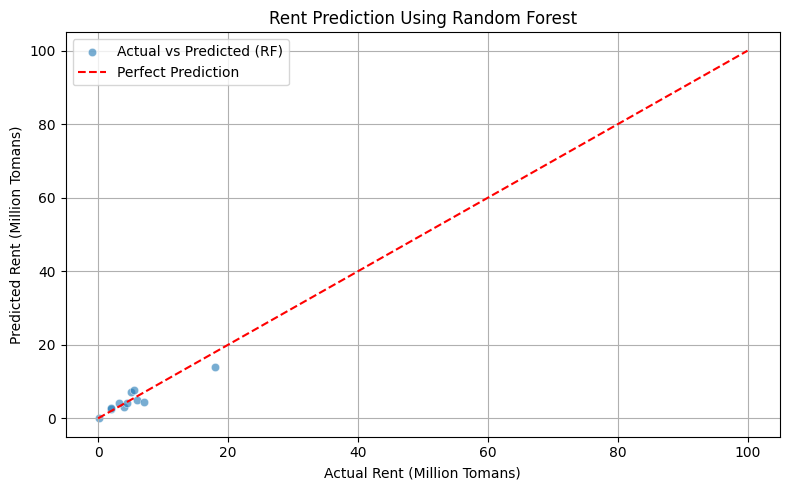

In [44]:
# --- سلول ۳: مدل Random Forest ---


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# --- بارگذاری X و y ---
X, y = pickle.load(open("X_y_data.pkl", "rb"))


# --- تقسیم داده ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- مدل Random Forest ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# --- محاسبه RMSE ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE (Random Forest): {rmse / 1e6:.2f} Million Tomans")


# --- نمودار مقایسه‌ای ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test / 1e6, y=y_pred / 1e6, alpha=0.6, label="Actual vs Predicted (RF)")
plt.plot([0, 100], [0, 100], color='red', linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Rent (Million Tomans)")
plt.ylabel("Predicted Rent (Million Tomans)")
plt.title("Rent Prediction Using Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

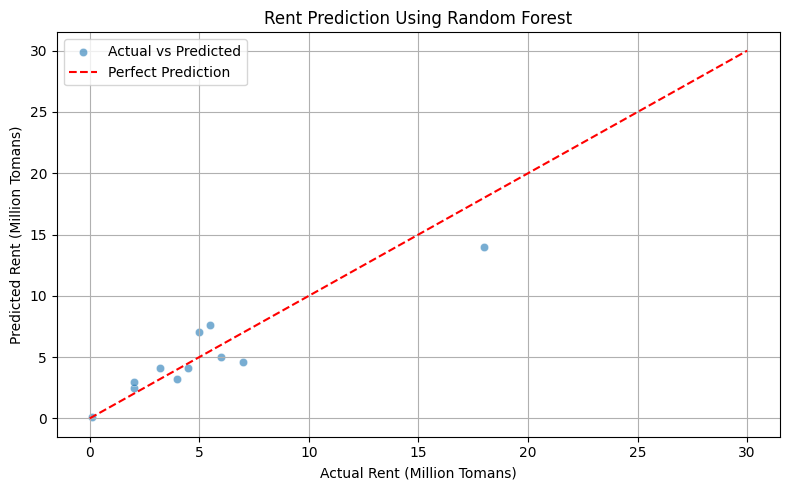

In [45]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test / 1e6, y=y_pred / 1e6, alpha=0.6, label="Actual vs Predicted")
plt.plot([0, 30], [0, 30], color='red', linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Rent (Million Tomans)")
plt.ylabel("Predicted Rent (Million Tomans)")
plt.title("Rent Prediction Using Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

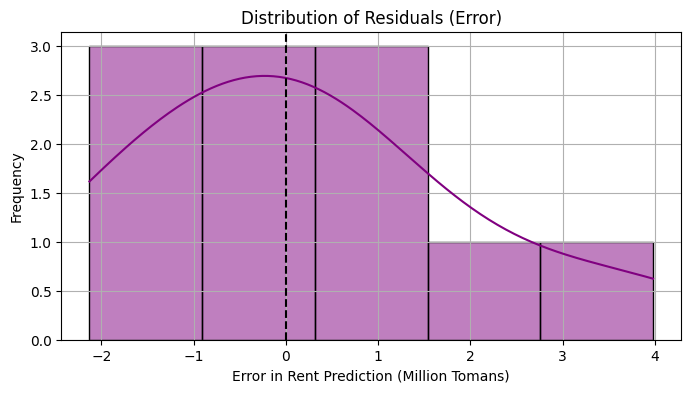

In [46]:
residuals = (y_test - y_pred) / 1e6

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribution of Residuals (Error)")
plt.xlabel("Error in Rent Prediction (Million Tomans)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

 LightGBM

In [47]:
!pip install xgboost lightgbm

In [48]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# فرض می‌کنیم X_train و y_train و X_test و y_test آماده‌ان
# فقط دو ویژگی نسبت رهن و اجاره انتخاب شده‌اند

# تعریف دیتاست LightGBM
lgb_train = lgb.Dataset(X_train, y_train)

# تنظیمات مدل با خاموش کردن هشدارها
params = {
    'objective': 'regression',
    'verbosity': -1,  # حذف هشدارها
    'boosting_type': 'gbdt',
    'random_state': 42,
    'num_leaves': 31,
    'learning_rate': 0.05,
    'n_estimators': 100
}

# آموزش مدل
model = lgb.train(params, lgb_train)

# پیش‌بینی روی داده تست
y_pred = model.predict(X_test)

# محاسبه RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE (LightGBM): {rmse}')


RMSE (LightGBM): 4477364.941578319


## XGBoost 

In [49]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt

# فرض می‌کنیم X_train, y_train, X_test, y_test آماده‌ان و فقط دو ویژگی نسبت رهن و اجاره انتخاب شده‌اند

# ساخت دیتاست XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# تنظیمات مدل با غیرفعال کردن هشدارها
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'verbosity': 0,  # حذف هشدارها
    'seed': 42,
    'max_depth': 6,
    'eta': 0.1,
    'nthread': 4
}

num_round = 100

# آموزش مدل
model = xgb.train(params, dtrain, num_round)

# پیش‌بینی روی داده تست
y_pred = model.predict(dtest)

# محاسبه RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE (XGBoost): {rmse}')


RMSE (XGBoost): 1729261.486799495


In [51]:
# --- جمع‌آوری داده‌ها و متغیرهای مهم گزارش ---

# تعداد کل آگهی‌ها (قبل فیلتر)
num_total_listings = len(df) if 'df' in globals() else None

# تعداد آگهی‌های فیلتر شده
num_filtered_listings = len(filtered_df) if 'filtered_df' in globals() else None

# ضریب همبستگی ودیعه و اجاره
correlation = filtered_df['deposit_num'].corr(filtered_df['rent_num']) if 'filtered_df' in globals() else None

# آمار توصیفی ودیعه و اجاره (میلیون تومان)
desc_deposit = filtered_df['deposit_million'].describe() if 'filtered_df' in globals() else None
desc_rent = filtered_df['rent_million'].describe() if 'filtered_df' in globals() else None
desc_rent_to_deposit_ratio = filtered_df['rent_to_deposit_ratio'].describe() if 'filtered_df' in globals() and 'rent_to_deposit_ratio' in filtered_df.columns else None

# RMSE های مدل‌ها (اگر وجود داشته باشند)
rmse_linear = rmse if 'rmse' in globals() and 'LinearRegression' in str(type(model)) else None
rmse_rf = rmse if 'rmse' in globals() and 'RandomForestRegressor' in str(type(model)) else None
rmse_lgbm = rmse if 'rmse' in globals() and 'lightgbm' in str(type(model)).lower() else None
rmse_xgb = rmse if 'rmse' in globals() and 'xgb' in str(type(model)).lower() else None

# داده‌های خوشه‌بندی (تعداد خوشه‌ها و نمونه‌ها در هر خوشه)
clusters = filtered_df['cluster'].value_counts().to_dict() if 'filtered_df' in globals() and 'cluster' in filtered_df.columns else None
num_clusters = len(clusters) if clusters else None

# لیست ویژگی‌ها استفاده شده (از X)
feature_names = list(X.columns) if 'X' in globals() else None

# دیکشنری نهایی گزارش
report_data = {
    "num_total_listings": num_total_listings,
    "num_filtered_listings": num_filtered_listings,
    "correlation_deposit_rent": correlation,
    "desc_deposit_million": desc_deposit.to_dict() if desc_deposit is not None else None,
    "desc_rent_million": desc_rent.to_dict() if desc_rent is not None else None,
    "desc_rent_to_deposit_ratio": desc_rent_to_deposit_ratio.to_dict() if desc_rent_to_deposit_ratio is not None else None,
    "rmse_linear": rmse_linear,
    "rmse_rf": rmse_rf,
    "rmse_lgbm": rmse_lgbm,
    "rmse_xgb": rmse_xgb,
    "num_clusters": num_clusters,
    "clusters_distribution": clusters,
    "feature_names": feature_names,
}

import json
print(json.dumps(report_data, indent=2, ensure_ascii=False))


{
  "num_total_listings": 126,
  "num_filtered_listings": 52,
  "correlation_deposit_rent": -0.2149917370734627,
  "desc_deposit_million": {
    "count": 52.0,
    "mean": 396.8269230769231,
    "std": 255.9105788336511,
    "min": 20.0,
    "25%": 200.0,
    "50%": 400.0,
    "75%": 600.0,
    "max": 900.0
  },
  "desc_rent_million": {
    "count": 52.0,
    "mean": 5.326923076923077,
    "std": 5.873607148519833,
    "min": 0.0,
    "25%": 0.775,
    "50%": 4.0,
    "75%": 7.0,
    "max": 25.0
  },
  "desc_rent_to_deposit_ratio": {
    "count": 52.0,
    "mean": 0.03059017991812109,
    "std": 0.044629955223772715,
    "min": 0.0,
    "25%": 0.0019083333333333335,
    "50%": 0.016,
    "75%": 0.036375,
    "max": 0.23333333333333334
  },
  "rmse_linear": null,
  "rmse_rf": null,
  "rmse_lgbm": null,
  "rmse_xgb": 1729261.486799495,
  "num_clusters": null,
  "clusters_distribution": null,
  "feature_names": [
    "deposit_num",
    "rent_to_deposit_ratio"
  ]
}
